# Chapitre 1: rappel python

## Importation des données

In [17]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df_exist = pd.read_csv("data/dpe-v2-logements-existants.csv")
df_neufs = pd.read_csv("data/dpe-v2-logements-neufs.csv")

C:\Users\axel-\AppData\Local\Temp\ipykernel_22140\2409033445.py:1: DtypeWarning: Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df_exist = pd.read_csv("data/dpe-v2-logements-existants.csv")


In [11]:
# affichage dimensions
df_exist.shape

(16069, 242)

In [12]:
df_neufs.shape

(2851, 220)

In [13]:
# Création de la colonne ancien ou neuf
df_exist["Logement"] = "ancien"
df_neufs["Logement"] = "neuf"

In [22]:
# Création de la colonne année en cours
df_neufs["Année_construction"] = date.today().year

In [25]:
# fusionner les deux dataframes (utilisation de inner pour éliminer les colonnes qui ne sont pas communes).
df = pd.concat([df_exist, df_neufs], join="inner")

In [32]:
# Création de la colonne avec l'année de  Date_réception_DPE
df["Année réception"] = df["Date_réception_DPE"]

df = df.copy()

In [34]:
# Verification du cout total
df["check_cout_total"] = df["Coût_total_5_usages"] == (df["Coût_chauffage"] + df["Coût_éclairage"] + df["Coût_ECS"] + df["Coût_refroidissement"] + df["Coût_auxiliaires"])

In [35]:
df["check_cout_total"].value_counts()

check_cout_total
False    12108
True      6812
Name: count, dtype: int64

In [39]:
# Créer une colonne Coût chauffage en % qui est la part du coût du chauffage dans le coût total 5 usages.
df["Coût chauffage en %"] = df["Coût_chauffage"] / df["Coût_total_5_usages"]

In [51]:
# Creer une colonne qui vérifie si Coût_total_5_usages correpoond bien à la somme du Coût_chauffage + Coût_éclairage + Coût_ECS + Coût_refroidissement + Coût_auxiliaires.

def periode_construction(x: float) -> str:

    if pd.isna(x):
        return pd.NA

    if x < 1960:
        return "Avant 1960"
    elif x < 1971:
        return "1961 - 1970"
    elif x < 1981:
        return "1971 - 1980"
    elif x < 1991:
        return "1981 - 1990"
    elif x < 2001:
        return "1991 - 2000"
    elif x < 2011:
        return "2001 - 2010"
    else:
        return "Après 2010"

In [52]:
df["Periode_construction"] = df["Année_construction"].apply(lambda x: periode_construction(x))

In [53]:
df["Periode_construction"]

0       2001 - 2010
1              <NA>
2              <NA>
3              <NA>
4              <NA>
           ...     
2846     Après 2010
2847     Après 2010
2848     Après 2010
2849     Après 2010
2850     Après 2010
Name: Periode_construction, Length: 18920, dtype: object

## Statistiques générales

In [56]:
# Calculer la répartition des logements par Etiquette_DPE
df["Etiquette_DPE"].value_counts(normalize=True)

Etiquette_DPE
C    0.395825
D    0.287051
E    0.178647
F    0.052748
B    0.051427
G    0.029123
A    0.005180
Name: proportion, dtype: float64

In [57]:
# Calculer la répartition des logements par Date_réception_DPE
df["Date_réception_DPE"].value_counts(normalize=True)

Date_réception_DPE
2022-09-19    0.032717
2023-07-31    0.017389
2023-01-13    0.017230
2022-07-06    0.016121
2023-01-27    0.011522
                ...   
2022-09-10    0.000053
2023-08-19    0.000053
2023-07-01    0.000053
2023-07-29    0.000053
2023-08-13    0.000053
Name: proportion, Length: 1059, dtype: float64

In [58]:
# Répartition par type de logement
pd.DataFrame(df["Logement"].value_counts(normalize=True))

,proportion
Logement,
ancien,0.849313
neuf,0.150687


In [27]:
df["Date_réception_DPE"].value_counts(normalize=True)

Date_réception_DPE
2022-09-19    0.032717
2023-07-31    0.017389
2023-01-13    0.017230
2022-07-06    0.016121
2023-01-27    0.011522
                ...   
2023-01-07    0.000053
2023-07-01    0.000053
2023-09-02    0.000053
2023-08-11    0.000053
2023-08-19    0.000053
Name: proportion, Length: 1059, dtype: float64

In [28]:
df["Type_bâtiment"].value_counts(normalize=True)

Type_bâtiment
appartement    0.972516
maison         0.017336
immeuble       0.010148
Name: proportion, dtype: float64

In [29]:
df["Type_installation_chauffage"].value_counts(normalize=True)

Type_installation_chauffage
individuel                      0.625310
collectif                       0.333136
mixte (collectif-individuel)    0.041554
Name: proportion, dtype: float64

In [30]:
df["Periode_construction"].value_counts(normalize=True)

Periode_construction
Après 2010     0.507294
Avant 1960     0.148943
1971 - 1980    0.077114
1991 - 2000    0.072357
1961 - 1970    0.066860
2001 - 2010    0.064112
1981 - 1990    0.063319
Name: proportion, dtype: float64

In [31]:
# Calculer la surface habitable moyenne des logements
df["Surface_habitable_logement"].mean()

np.float64(56.568295024265375)

In [32]:
df["Coût_chauffage"].mean()

np.float64(711.6565591966173)

In [33]:
df["Coût_ECS"].quantile(0.25)

np.float64(181.0)

In [34]:
df["Coût_ECS"].quantile(0.50)

np.float64(253.0)

In [35]:
df["Coût_ECS"].quantile(0.75)

np.float64(345.0)

In [67]:
# Calculer les déciles du Coût_ECS.
deciles = list()

for i in range(10):
    deciles.append(df["Coût_ECS"].quantile(i/10))

df_deciles = pd.DataFrame({
    "% deciles": [i/10 for i in range(10)],
    "deciles": deciles 
})

df_deciles.set_index("% deciles")

,deciles
% deciles,
0.0,0.0
0.1,140.6
0.2,170.6
0.3,191.5
0.4,215.5
0.5,253.0
0.6,287.4
0.7,322.7
0.8,365.4


In [ ]:
# Calculer le coefficient de corrélation entre la surface habitable du logement et le coût du chauffage.
df["Surface_habitable_logement"].corr(df["Coût_chauffage"])

np.float64(0.5486576341483373)

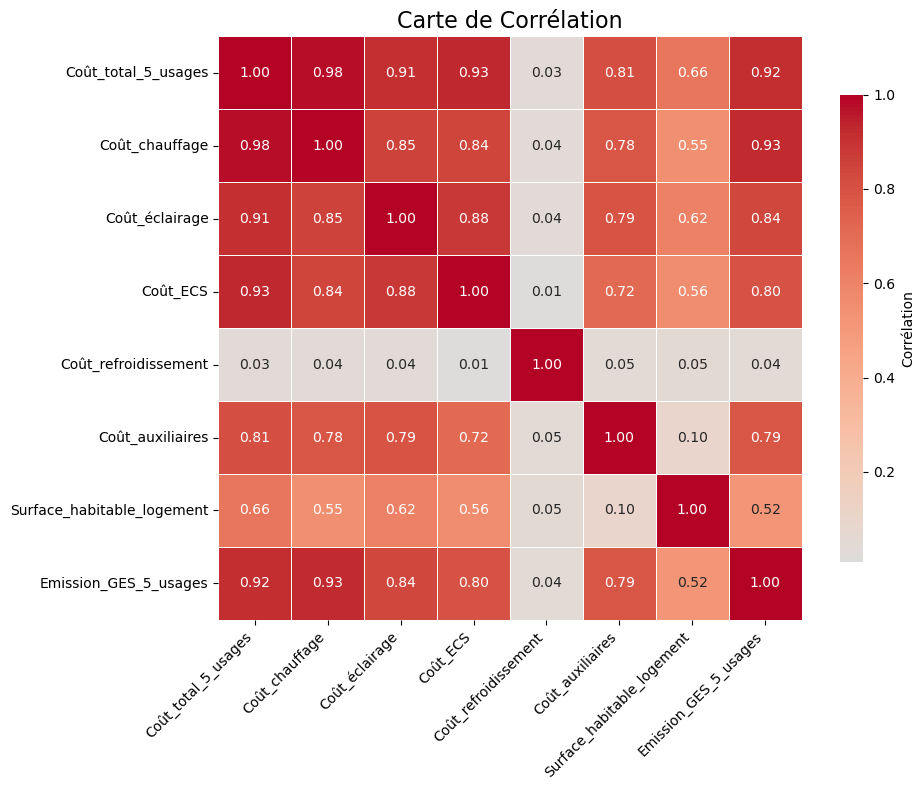

In [80]:
# Construire un corrélogramme sur ces variables (Coût_total_5_usages,Coût_chauffage,Coût_éclairage,Coût_ECS,Coût_refroidissement, Coût_auxiliaires, Surface_habitable_logement , Emission_GES_5_usages)
corr_matrix = df[["Coût_total_5_usages", "Coût_chauffage", "Coût_éclairage", "Coût_ECS", "Coût_refroidissement", "Coût_auxiliaires", "Surface_habitable_logement", "Emission_GES_5_usages"]].corr()

plt.figure(figsize=(10, 8))  # Taille de la figure

sns.heatmap(
    corr_matrix, 
    annot=True,            # Affiche les valeurs dans les cellules
    fmt=".2f",             # Format des valeurs
    cmap="coolwarm",       # Palette de couleurs
    square=True, 
    center=0, 
    linewidths=0.5,        # Lignes entre les cellules
    cbar_kws={"shrink": 0.8, "label": "Corrélation"}  # Barre de couleur
)

plt.title('Carte de Corrélation', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotation des labels x
plt.yticks(rotation=0)               # Rotation des labels y
plt.tight_layout()
plt.show()

## Filtre

In [81]:
df[df["Type_bâtiment"] == "appartement"]

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-05-17,False,0.636414,2001 - 2010
1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-07-06,True,0.415074,<NA>
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-03-29,False,0.869773,<NA>
3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.592629,<NA>
4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.603996,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,2469N2074360F,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,True,0.453171,Après 2010
2832,2469N2074176D,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,False,0.441921,Après 2010
2833,2469N2074603O,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,False,0.474849,Après 2010
2834,2469N2074538B,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,True,0.432335,Après 2010


In [82]:
df[df["Etiquette_DPE"].isin(["D", "E", "F", "G"])]

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-03-29,False,0.869773,<NA>
3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.592629,<NA>
4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.603996,<NA>
5,2269E1917191V,2022-08-26,2022-08-25,2022-08-23,DPE 3CL 2021 méthode logement,NaN,2032-08-24,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-08-26,False,0.611404,<NA>
6,2369E0405327G,2023-02-07,2023-02-06,2023-02-06,DPE 3CL 2021 méthode logement,NaN,2033-02-05,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-02-07,False,0.516193,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,2469N2399606R,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,2469N2399597I,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.602711,Après 2010
1979,2469N2399618D,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,2469N2399597I,1.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.536678,Après 2010
1982,2469N2399614Z,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,2469N2399597I,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.479581,Après 2010
1983,2469N2399597I,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.534576,Après 2010


In [83]:
df[(df["Logement"] == "ancien")&(df["Periode_construction"] == "Avant 1960")]

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
8,2169E0887295K,2021-12-09,2021-12-09,2021-12-09,DPE 3CL 2021 méthode logement,NaN,2031-12-08,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-12-09,True,0.640931,Avant 1960
15,2169E0589041C,2021-10-28,2021-10-28,2021-10-28,DPE 3CL 2021 méthode logement,NaN,2031-10-27,1.1,NaN,NaN,...,1.0,Solaire Photovoltaïque,1.0,NaN,NaN,ancien,2021-10-28,False,0.588700,Avant 1960
16,2269E2441112Q,2022-10-19,2022-10-18,2022-08-30,DPE 3CL 2021 méthode logement,NaN,2032-10-17,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-10-19,False,0.344346,Avant 1960
116,2369E0282121O,2023-01-29,2023-01-28,2023-01-24,DPE 3CL 2021 méthode logement,NaN,2033-01-27,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-01-29,False,0.483187,Avant 1960
144,2369E3655915W,2023-10-27,2023-10-26,2023-10-17,DPE 3CL 2021 méthode logement,NaN,2033-10-25,2.3,2369E3655482F,1.0,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-10-27,True,0.370600,Avant 1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16059,2269E3211592M,2023-01-26,2022-12-29,2022-12-29,DPE 3CL 2021 méthode logement,NaN,2032-12-28,2.2,NaN,0.0,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-01-26,False,0.548831,Avant 1960
16060,2369E0268106N,2023-01-27,2023-01-10,2023-01-10,DPE 3CL 2021 méthode logement,NaN,2033-01-09,2.2,NaN,0.0,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-01-27,False,0.598677,Avant 1960
16061,2269E3216604G,2023-02-16,2022-12-15,2022-12-15,DPE 3CL 2021 méthode logement,2269E3183410O,2032-12-14,2.2,NaN,0.0,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-02-16,False,0.631340,Avant 1960
16063,2369E2243512R,2023-07-04,2023-06-28,2023-06-28,DPE 3CL 2021 méthode logement,2369E2233410D,2033-06-27,2.3,NaN,0.0,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-07-04,True,0.935531,Avant 1960


In [41]:
df[df["Surface_habitable_logement"] > df["Surface_habitable_logement"].mean()]

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023,False,0.636414,2001 - 2010
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024,False,0.869773,Après 2010
5,2269E1917191V,2022-08-26,2022-08-25,2022-08-23,DPE 3CL 2021 méthode logement,NaN,2032-08-24,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022,False,0.611404,Après 2010
6,2369E0405327G,2023-02-07,2023-02-06,2023-02-06,DPE 3CL 2021 méthode logement,NaN,2033-02-05,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023,False,0.516193,Après 2010
8,2169E0887295K,2021-12-09,2021-12-09,2021-12-09,DPE 3CL 2021 méthode logement,NaN,2031-12-08,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021,True,0.640931,Avant 1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2469N2622948T,2024-07-19,2024-07-18,2024-07-07,DPE NEUF logement : RT2012,NaN,2034-07-17,2.4,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024,False,0.602694,Après 2010
2847,2469N1847972Z,2024-05-27,2024-05-14,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-13,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024,False,0.624161,Après 2010
2848,2469N1761971G,2024-05-20,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024,False,0.652582,Après 2010
2849,2469N2286221S,2024-06-25,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024,False,0.652582,Après 2010


In [84]:
df.sort_values("Conso_5_usages/m²_é_finale", ascending = False)

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
3323,2469E1890439Z,2024-05-29,2024-04-09,2024-04-09,DPE 3CL 2021 méthode logement,NaN,2034-04-08,2.3,2469E1543254S,0.0,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2024-05-29,False,0.518643,Avant 1960
8575,2169E0807345K,2021-11-30,2021-11-23,2021-10-04,DPE 3CL 2021 méthode logement,NaN,2031-11-22,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-11-30,True,0.322833,1971 - 1980
15909,2169E0588245M,2021-10-28,2021-10-28,2021-10-28,DPE 3CL 2021 méthode logement,NaN,2031-10-27,1.1,NaN,NaN,...,1.0,Solaire Photovoltaïque,1.0,NaN,NaN,ancien,2021-10-28,False,0.639736,Avant 1960
2363,2369E1131231Q,2023-04-05,2023-04-04,2023-03-07,DPE 3CL 2021 méthode logement,NaN,2033-04-03,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-04-05,True,0.690271,<NA>
8577,2169E0199254H,2021-08-21,2021-08-21,2021-07-27,DPE 3CL 2021 méthode logement,NaN,2031-08-20,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-08-21,True,0.561446,Avant 1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2369N1889414W,2023-06-07,2023-06-05,2023-05-09,DPE NEUF logement : RT2012,NaN,2033-06-04,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2023-06-07,False,0.290593,Après 2010
8243,2169E0731222P,2021-11-20,2021-11-20,2021-11-20,DPE 3CL 2021 méthode logement,NaN,2031-11-19,1.1,NaN,NaN,...,0.0,Eolien + Cogénération,0.0,NaN,NaN,ancien,2021-11-20,False,0.138614,1961 - 1970
1378,2369N1889405N,2023-06-07,2023-06-05,2023-05-09,DPE NEUF logement : RT2012,NaN,2033-06-04,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2023-06-07,False,0.233925,Après 2010
1083,2369N1243296E,2023-04-14,2023-04-11,2023-04-11,DPE NEUF logement : RT2012,NaN,2033-04-10,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2023-04-14,False,0.717296,Après 2010


In [43]:
df.sort_values(by=["Etiquette_DPE", "Periode_construction", "Coût_chauffage"], ascending = [True, True, False])

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
1635,2469E2650900M,2024-07-22,2024-07-21,2024-07-18,DPE 3CL 2021 méthode logement,2469E2650840E,2034-07-20,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024,True,0.709997,Après 2010
15302,2369E2910614L,2023-09-01,2023-08-31,2023-08-30,DPE 3CL 2021 méthode logement,NaN,2033-08-30,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023,True,0.463910,Après 2010
2838,2269N1758937M,2022-08-01,2022-07-31,2022-07-25,DPE NEUF logement : RT2012,NaN,2032-07-30,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2022,False,0.696099,Après 2010
2843,2469N2695941E,2024-07-25,2024-07-24,2024-07-07,DPE NEUF logement : RT2012,NaN,2034-07-23,2.4,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024,False,0.620178,Après 2010
2848,2469N1761971G,2024-05-20,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,neuf,2024,False,0.652582,Après 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,2469E0571340K,2024-02-16,2024-02-15,2024-02-12,DPE 3CL 2021 méthode logement,NaN,2034-02-14,2.3,2469E0567423T,1.0,...,NaN,NaN,NaN,NaN,NaN,ancien,2024,False,0.628813,Avant 1960
11544,2269E0438550A,2022-03-04,2022-03-03,2022-03-03,DPE 3CL 2021 méthode logement,NaN,2032-03-02,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022,False,0.403776,Avant 1960
5130,2169E0682697G,2021-11-14,2021-07-22,2021-07-29,DPE 3CL 2021 méthode logement,2169E0113656B,2031-07-21,1.1,NaN,NaN,...,0.0,Eolien + Cogénération,0.0,NaN,NaN,ancien,2021,False,0.423197,Avant 1960
11438,2169E0306072R,2021-09-13,2021-09-13,2021-09-09,DPE 3CL 2021 méthode logement,NaN,2031-09-12,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021,True,0.283997,Avant 1960


## Agrégation

In [44]:
df.groupby(by="Etiquette_DPE")["Coût_chauffage"].mean()

Etiquette_DPE
A     193.414286
B     170.926413
C     502.142449
D     718.573301
E    1049.023521
F    1298.834669
G    1405.123775
Name: Coût_chauffage, dtype: float64

In [45]:
df.groupby(by="Periode_construction")["Coût_total_5_usages"].mean()

Periode_construction
1961 - 1970    1680.073439
1971 - 1980    2243.238588
1981 - 1990    1621.043740
1991 - 2000    1181.871585
2001 - 2010     927.770816
Après 2010      913.308971
Avant 1960     1528.047303
Name: Coût_total_5_usages, dtype: float64

In [46]:
df.groupby(by=["Logement", "Etiquette_DPE"])["Coût_total_5_usages"].mean()

Logement  Etiquette_DPE
ancien    A                1101.340000
          B                 525.395775
          C                1136.833733
          D                1255.664863
          E                1603.122301
          F                1803.781363
          G                1841.800544
neuf      A                 390.791398
          B                 427.229844
          C                 675.917227
          D                1205.633333
          E                1048.300000
Name: Coût_total_5_usages, dtype: float64

## Création de graphique

<Axes: >

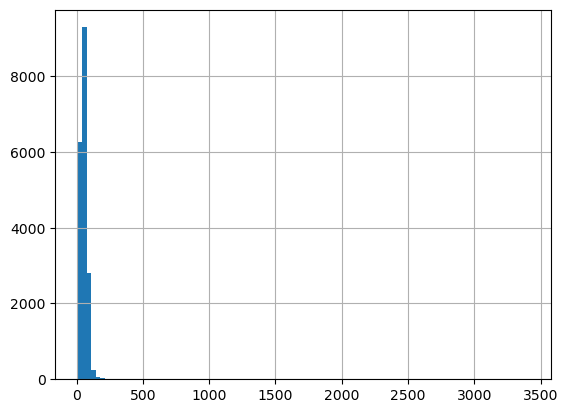

In [47]:
df["Surface_habitable_logement"].hist(bins=100)

<Axes: >

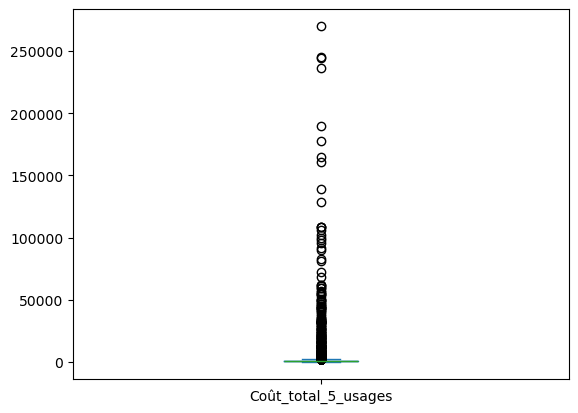

In [48]:
df["Coût_total_5_usages"].plot(kind="box")

C:\Users\axcano\AppData\Local\Temp\ipykernel_5988\461168864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["Coût_total_5_usages"] < 4000], x='Etiquette_DPE', y='Coût_total_5_usages', palette='coolwarm')


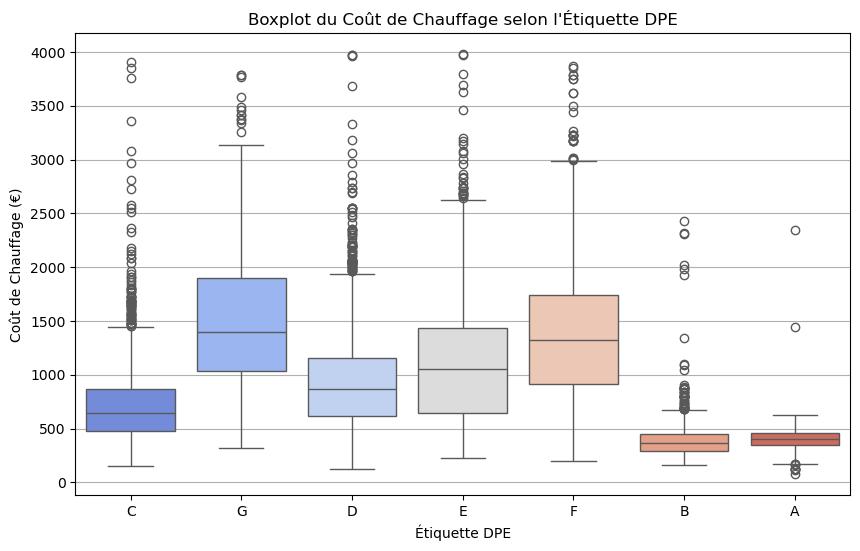

In [116]:
# Construire un boxplot avec le coût du chauffage selon le type d'étiquette DPE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["Coût_total_5_usages"] < 4000], x='Etiquette_DPE', y='Coût_total_5_usages', palette='coolwarm')
plt.title("Boxplot du Coût de Chauffage selon l'Étiquette DPE")
plt.xlabel("Étiquette DPE")
plt.ylabel("Coût de Chauffage (€)")
plt.grid(True, axis='y')
plt.show()

C:\Users\axcano\AppData\Local\Temp\ipykernel_5988\2654934479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df["Periode_construction"].value_counts(), palette='coolwarm')


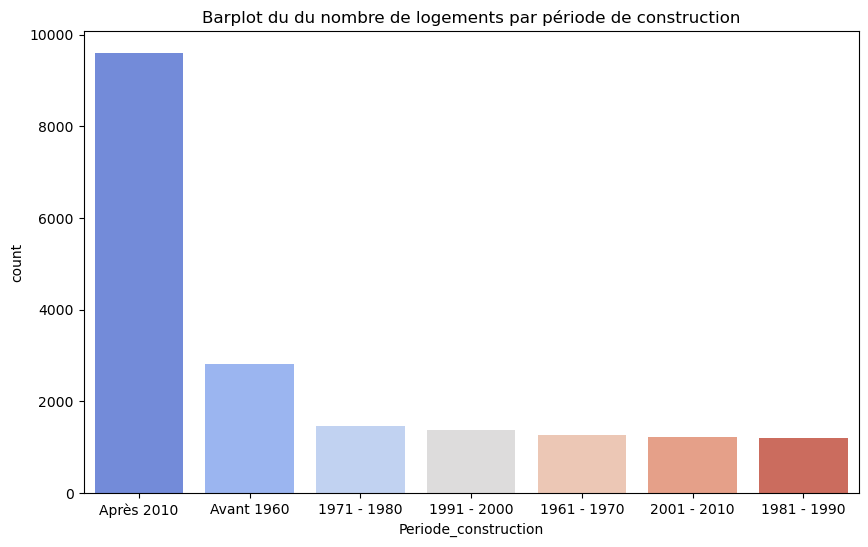

In [50]:
# Construire un boxplot avec le coût du chauffage selon le type d'étiquette DPE
plt.figure(figsize=(10, 6))
sns.barplot(data=df["Periode_construction"].value_counts(), palette='coolwarm')
plt.title("Barplot du du nombre de logements par période de construction")
plt.show()

<Axes: ylabel='count'>

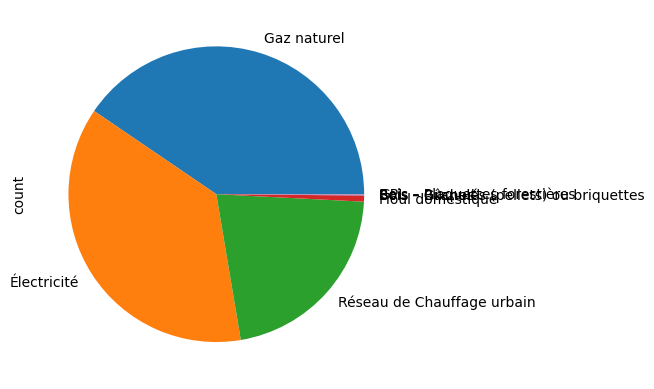

In [51]:
df["Type_énergie_n°1"].value_counts().plot(kind="pie")

# Regression linéaire simple

<Axes: xlabel='Surface_habitable_logement', ylabel='Coût_chauffage'>

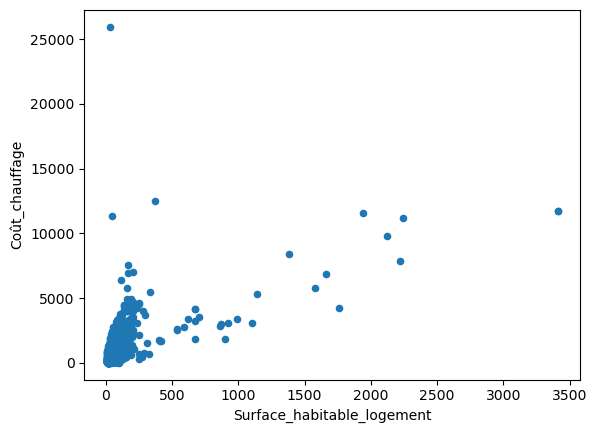

In [52]:
# Construire une nuage de point entre la surface habitable du logement et le coût du chauffage
df.plot.scatter(x="Surface_habitable_logement", y="Coût_chauffage")

In [53]:
# Calculer le coefficient de corrélation entre la surface habitable du logement et le coût du chauffage.
df["Surface_habitable_logement"].corr(df["Coût_chauffage"])

np.float64(0.5486576341483371)

In [54]:
df["Coût_chauffage"].values

array([ 694.2,  267.1, 2417.1, ...,  417. ,  417. ,  372. ],
      shape=(18920,))

In [55]:
import numpy as np

df_clean = df[["Coût_chauffage", "Surface_habitable_logement"]].dropna()

In [56]:

# Construire une régression linéaire simple pour modéliser le coût du chauffage en fonction de la surface habitable
y = df_clean["Coût_chauffage"]
X = df_clean[["Surface_habitable_logement"]]

reg = LinearRegression()

reg.fit(X, y)

LinearRegression()

In [57]:
reg.score(X, y)

0.30102519950925055

In [58]:
reg.coef_


array([4.80125029])

In [59]:
reg.coef_

array([4.80125029])

In [60]:
reg

LinearRegression()

In [61]:
prediction = reg.predict(X)

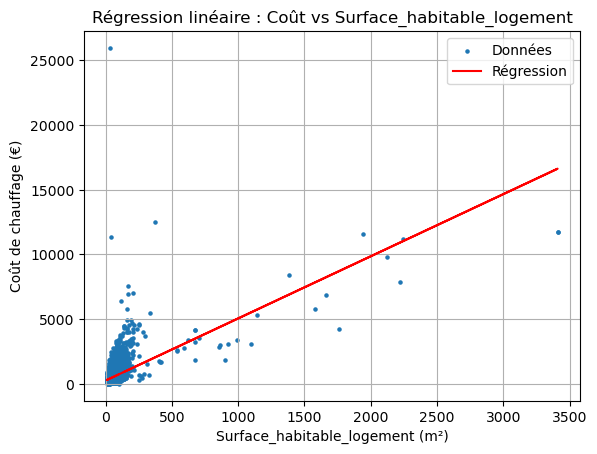

In [62]:
# Nuage de points
plt.scatter(X, y, label='Données', s=5)

# Droite de régression
plt.plot(X, prediction, color='red', label='Régression')

# Mise en forme
plt.xlabel('Surface_habitable_logement (m²)')
plt.ylabel('Coût de chauffage (€)')
plt.title('Régression linéaire : Coût vs Surface_habitable_logement')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
df_adr = pd.read_csv("data/adresses-69.csv", sep=";")

C:\Users\axcano\AppData\Local\Temp\ipykernel_5988\3248176561.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adr = pd.read_csv("data/adresses-69.csv", sep=";")


In [79]:
df

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,lat,type_position,alias,nom_ld,libelle_acheminement,nom_afnor,source_position,source_nom_voie,certification_commune,cad_parcelles
0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,NaN,...,45.737032,entrée,NaN,NaN,LYON,BOULEVARD JEAN XXIII,commune,commune,1,NaN
1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,NaN,...,45.739904,entrée,NaN,NaN,LYON,BOULEVARD JEAN XXIII,commune,commune,1,NaN
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,45.722825,entrée,NaN,NaN,LYON,AVENUE PAUL SANTY,commune,commune,1,NaN
3,2269E1917191V,2022-08-26,2022-08-25,2022-08-23,DPE 3CL 2021 méthode logement,NaN,2032-08-24,2.2,NaN,NaN,...,45.740198,entrée,NaN,NaN,LYON,RUE VOLNEY,commune,commune,1,NaN
4,2369E0405327G,2023-02-07,2023-02-06,2023-02-06,DPE 3CL 2021 méthode logement,NaN,2033-02-05,2.2,NaN,NaN,...,45.725967,entrée,NaN,NaN,LYON,RUE PHILIPPE FABIA,commune,commune,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,2469N0895951U,2024-03-12,2024-03-11,2024-03-10,DPE NEUF logement : RT2012,NaN,2034-03-10,2.3,NaN,0.0,...,45.733893,entrée,NaN,NaN,LYON,RUE ANTOINE DUMONT,commune,commune,1,NaN
17700,2469N0719511Q,2024-02-27,2024-02-26,2024-02-26,DPE NEUF logement : RT2012,NaN,2034-02-25,2.3,NaN,0.0,...,45.724129,entrée,NaN,NaN,LYON,RUE GENERAL ANDRE,commune,commune,1,NaN
17701,2469N0719527G,2024-02-27,2024-02-26,2024-02-26,DPE NEUF logement : RT2012,NaN,2034-02-25,2.3,NaN,0.0,...,45.724129,entrée,NaN,NaN,LYON,RUE GENERAL ANDRE,commune,commune,1,NaN
17702,2469N0375747Y,2024-02-01,2024-01-31,2024-01-28,DPE NEUF logement : RT2012,NaN,2034-01-30,2.3,2469N0375655K,0.0,...,45.726998,entrée,NaN,NaN,LYON,RUE STEPHANE COIGNET,commune,commune,1,NaN


In [64]:
# Réaliser une jointure sur le champ Identifiant__BAN pour ajouter les coordonnées GPS (lattitude / longitude) au dataframe initial
df = df.merge(df_adr, left_on="Identifiant__BAN", right_on="id")


In [96]:
# isoler les colonnes voulues.
df_map = df.loc[:, ["Etiquette_DPE", "Année_construction", "Type_bâtiment", "Type_installation_chauffage", "lon", "lat", "Surface_habitable_logement"]]

In [102]:
df[df["Coût_chauffage"] == df["Coût_chauffage"].max()]["Surface_habitable_logement"]

9303   NaN
Name: Surface_habitable_logement, dtype: float64

In [67]:
import folium

In [112]:

# Centre de la carte (moyenne des points)
centre = [df_map['lat'].mean(), df_map['lon'].mean()]

# Création de la carte centrée
m = folium.Map(location=centre, zoom_start=12)

couleurs_dpe = {
    'A': 'green',
    'B': 'lime',
    'C': 'yellow',
    'D': 'orange',
    'E': 'red',
    'F': 'darkred',
    'G': 'black'
}

# Ajouter les points avec des marqueurs
for _, row in df_map.iterrows():
    couleur = couleurs_dpe.get(row['Etiquette_DPE'], 'gray')
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        popup=row['Etiquette_DPE'],         # texte au clic sur le marqueur
        color=couleur,
        fill=True,
        fill_color=couleur,
        fill_opacity=0.8,
    ).add_to(m)

In [113]:
m.save("test.html")